In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from scipy.interpolate import LSQUnivariateSpline, UnivariateSpline

In [2]:
df_statswin = pd.read_csv('winnerstats.csv')
df_statslose = pd.read_csv('loserstats.csv')

In [26]:
df_statswin.head()

,Unnamed: 0,gpm,assist,lasthits,deaths
0,0,480.6,87,713,17
1,1,558.2,83,990,37
2,2,404.2,90,573,22
3,3,427.2,110,626,65
4,4,567.0,59,668,16


Uncomment below lines to recreate winnerstats.csv and loserstats.csv.

In [21]:
df_players = pd.read_csv('players.csv')
df_players.head()

,match_id,account_id,hero_id,player_slot,gold,gold_spent,gold_per_min,xp_per_min,kills,deaths,...,unit_order_glyph,unit_order_eject_item_from_stash,unit_order_cast_rune,unit_order_ping_ability,unit_order_move_to_direction,unit_order_patrol,unit_order_vector_target_position,unit_order_radar,unit_order_set_item_combine_lock,unit_order_continue
0,0,0,86,0,3261,10960,347,362,9,3,...,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN
1,0,1,51,1,2954,17760,494,659,13,3,...,NaN,NaN,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN
2,0,0,83,2,110,12195,350,385,0,4,...,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN
3,0,2,11,3,1179,22505,599,605,8,4,...,1.0,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN
4,0,3,67,4,3307,23825,613,762,20,3,...,3.0,NaN,NaN,23.0,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
won = np.repeat(1, 50000)
loss = np.repeat(0, 50000)

array([0, 0, 0, ..., 0, 0, 0])

In [31]:
df_statswin['won'] = won
df_statslose['won'] = loss

,Unnamed: 0,gpm,assist,lasthits,deaths,won
0,0,480.6,87,713,17,1
1,1,558.2,83,990,37,1
2,2,404.2,90,573,22,1
3,3,427.2,110,626,65,1
4,4,567.0,59,668,16,1
5,5,513.0,87,326,23,1
6,6,514.2,73,795,29,1
7,7,526.2,71,678,26,1
8,8,527.4,50,541,18,1
9,9,448.6,98,732,40,1


In [3]:
# df_players = pd.read_csv('players.csv')
# df_match = pd.read_csv('match.csv')

In [4]:
# def find_winner(matchid):
#     result = df_match.loc[matchid, 'radiant_win']
#     if result == True:
#         ret = 1
#     if result == False:
#         ret = 0
#     return ret

In [5]:
# df_win = df_players[0:5]
# df_lose = df_players[5:10]
# for x in range(10, 500000, 10):
#     start = x
#     end = x + 10
#     df_newmatch = df_players[start:end]
#     radiant = df_newmatch[0:5]
#     dire = df_newmatch[5:10]
#     result = find_winner(df_players.loc[start, 'match_id'])
#     if result == 1:
#         df_win = df_win.append(radiant, ignore_index=True)
#         df_lose = df_lose.append(dire, ignore_index=True)
#     if result == 0:
#         df_win = df_win.append(dire, ignore_index=True)
#         df_lose = df_lose.append(radiant, ignore_index=True)

In [6]:
# df_win.to_csv('winningteams.csv')
# df_lose.to_csv('losingteams.csv')

In [7]:
# df_win = pd.read_csv('winningteams.csv')
# df_lose = pd.read_csv('losingteams.csv')

In [8]:
# gpm_win = np.array([480.6])
# for x in range(5, 250000, 5):
#     df_test = df_win[x : x + 5]
#     gpmpoint = df_test["gold_per_min"].mean()
#     gpm_win = np.append(gpm_win, gpmpoint)
    
# assist_win = np.array([87])
# for x in range(5, 250000, 5):
#     df_test = df_win[x : x + 5]
#     assistpoint = df_test["assists"].sum()
#     assist_win = np.append(assist_win, assistpoint)

# lh_win = np.array([713])
# for x in range(5, 250000, 5):
#     df_test = df_win[x : x + 5]
#     lhpoint = df_test["last_hits"].sum()
#     lh_win = np.append(lh_win, lhpoint)

# death_win = np.array([17])
# for x in range(5, 250000, 5):
#     df_test = df_win[x : x + 5]
#     deathpoint = df_test["deaths"].sum()
#     death_win = np.append(death_win, deathpoint)

# gpm_lose = np.array([367.4])
# for x in range(5, 250000, 5):
#     df_test = df_lose[x : x + 5]
#     gpmpoint = df_test["gold_per_min"].mean()
#     gpm_lose = np.append(gpm_lose, gpmpoint)

# assist_lose = np.array([87])
# for x in range(5, 250000, 5):
#     df_test = df_lose[x : x + 5]
#     assistpoint = df_test["assists"].sum()
#     assist_lose = np.append(assist_lose, assistpoint)

# lh_lose = np.array([551])
# for x in range(5, 250000, 5):
#     df_test = df_lose[x : x + 5]
#     lhpoint = df_test["last_hits"].sum()
#     lh_lose = np.append(lh_lose, lhpoint)

# death_lose = np.array([52])
# for x in range(5, 250000, 5):
#     df_test = df_lose[x : x + 5]
#     deathpoint = df_test["deaths"].sum()
#     death_lose = np.append(death_lose, deathpoint)

In [9]:
# df_statswin = pd.DataFrame({'gpm': gpm_win, 'assist': assist_win, 'lasthits': lh_win, 'deaths' : death_win})
# df_statslose = pd.DataFrame({'gpm': gpm_lose, 'assist': assist_lose, 'lasthits': lh_lose, 'deaths' : death_lose})
# df_statswin.to_csv('winnerstats.csv')
# df_statslose.to_csv('loserstats.csv')

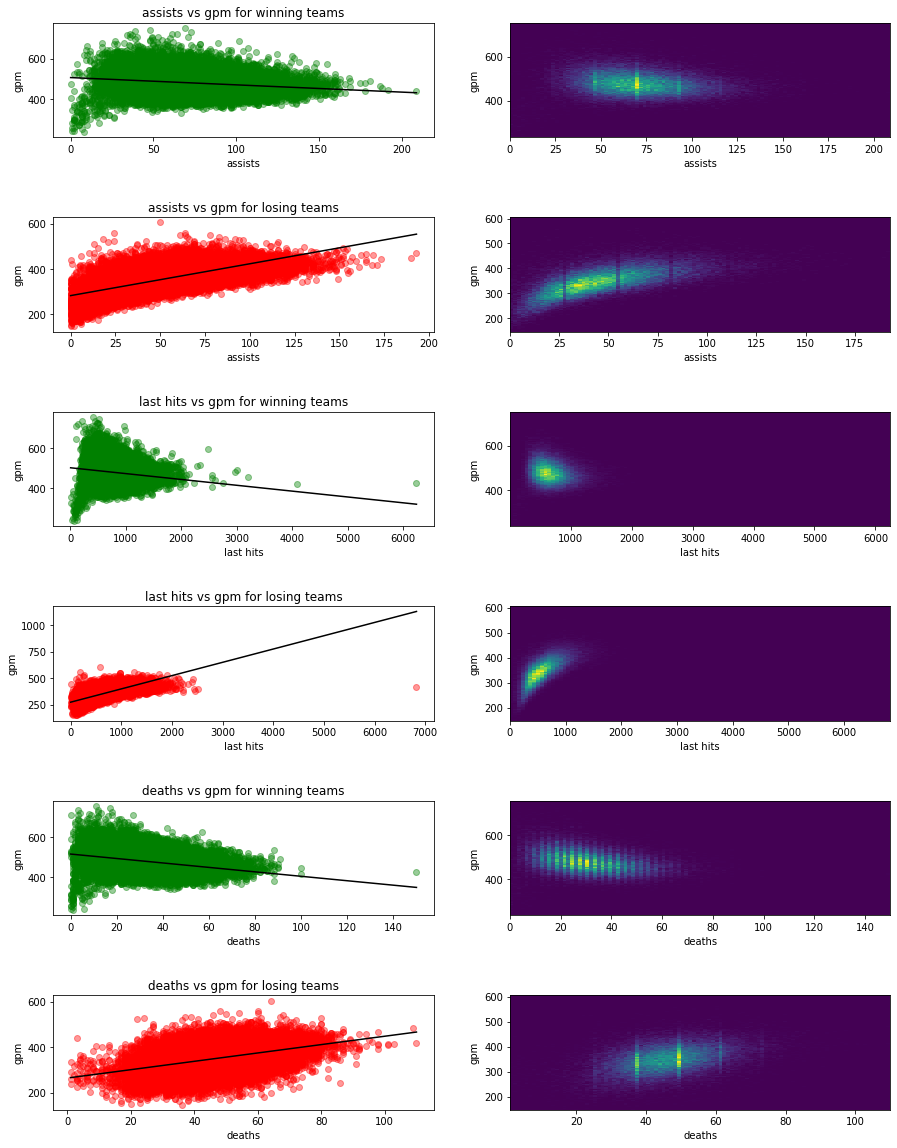

In [41]:
fig, axs = plt.subplots(6,2, figsize=(15,20))
plt.subplots_adjust(hspace=0.7)

ax = axs[0,0]
x = df_statswin['assist']
y = df_statswin['gpm']
ax.scatter(x, y, color='green', alpha=0.4, label='data')
ax.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color = 'black')
ax.set_title('assists vs gpm for winning teams')
ax.set_xlabel('assists')
ax.set_ylabel('gpm')

ax = axs[1,0]
x = df_statslose['assist']
y = df_statslose['gpm']
ax.scatter(x, y, color='red', alpha=0.4, label='data')
ax.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color = 'black')
ax.set_title('assists vs gpm for losing teams')
ax.set_xlabel('assists')
ax.set_ylabel('gpm')

ax = axs[2,0]
x = df_statswin['lasthits']
y = df_statswin['gpm']
ax.scatter(x, y, color='green', alpha=0.4, label='data')
ax.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color = 'black')
ax.set_title('last hits vs gpm for winning teams')
ax.set_xlabel('last hits')
ax.set_ylabel('gpm')

ax = axs[3,0]
x = df_statslose['lasthits']
y = df_statslose['gpm']
ax.scatter(x, y, color='red', alpha=0.4, label='data')
ax.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color = 'black')
ax.set_title('last hits vs gpm for losing teams')
ax.set_xlabel('last hits')
ax.set_ylabel('gpm')

ax = axs[4,0]
x = df_statswin['deaths']
y = df_statswin['gpm']
ax.scatter(x, y, color='green', alpha=0.4, label='data')
ax.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color = 'black')
ax.set_title('deaths vs gpm for winning teams')
ax.set_xlabel('deaths')
ax.set_ylabel('gpm')

ax = axs[5,0]
x = df_statslose['deaths']
y = df_statslose['gpm']
ax.scatter(x, y, color='red', alpha=0.4, label='data')
ax.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color = 'black')
ax.set_title('deaths vs gpm for losing teams')
ax.set_xlabel('deaths')
ax.set_ylabel('gpm')

ax = axs[0,1]
ax.hist2d(df_statswin['assist'], df_statswin['gpm'], bins=100)
ax.set_xlabel('assists')
ax.set_ylabel('gpm')

ax = axs[1,1]
ax.hist2d(df_statslose['assist'], df_statslose['gpm'], bins=100)
ax.set_xlabel('assists')
ax.set_ylabel('gpm')

ax = axs[2,1]
ax.hist2d(df_statswin['lasthits'], df_statswin['gpm'], bins=100)
ax.set_xlabel('last hits')
ax.set_ylabel('gpm')

ax = axs[3,1]
ax.hist2d(df_statslose['lasthits'], df_statslose['gpm'], bins=100)
ax.set_xlabel('last hits')
ax.set_ylabel('gpm')

ax = axs[4,1]
ax.hist2d(df_statswin['deaths'], df_statswin['gpm'], bins=100)
ax.set_xlabel('deaths')
ax.set_ylabel('gpm')

ax = axs[5,1]
ax.hist2d(df_statslose['deaths'], df_statslose['gpm'], bins=100)
ax.set_xlabel('deaths')
ax.set_ylabel('gpm')

fig.savefig('graphs.png')

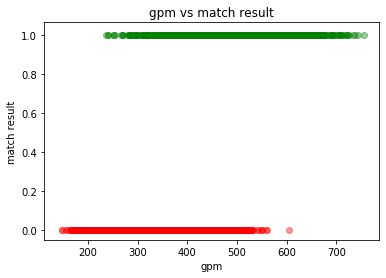

In [42]:
fig, ax = plt.subplots()
ax.scatter(df_statswin['gpm'], df_statswin['won'], color='green', alpha=0.4, label='data')
ax.scatter(df_statslose['gpm'], df_statslose['won'], color='red', alpha=0.4, label='data')
ax.set_title('gpm vs match result')
ax.set_xlabel('gpm')
ax.set_ylabel('match result')

fig.savefig('graphs2.png')

logistic, spline, 2d histogram

In [34]:
results_gpm_win = smf.ols('gpm ~ 1 + assist + lasthits + deaths', data=df_statswin).fit()
results_gpm_win.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gpm   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     2231.
Date:                Thu, 05 Dec 2019   Prob (F-statistic):               0.00
Time:                        14:52:01   Log-Likelihood:            -2.5759e+05
No. Observations:               50000   AIC:                         5.152e+05
Df Residuals:                   49996   BIC:                         5.152e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    511.2212      0.724    706.351      0.000     509.803     512.640
assist        -0.0047      0.010     -0.479      0.632      -0.024       0.015
lasthits       0.0116      0.001     12.235      0.000       0.010       0.013
deaths        -1.2307      0.019    -63.968      0.000      -1.268      -1.193
==============================================================================
Omnibus:                     1693.669   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3883.060
Skew:                           0.193   Prob(JB):                         0.00
Kurtosis:                       4.309   Cond. No.                     2.85e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.85e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
results_gpm_win.bse

Intercept    0.723750
assist       0.009826
lasthits     0.000949
deaths       0.019240
dtype: float64

In [12]:
results_gpm_lose = smf.ols('gpm ~ 1 + assist + lasthits + deaths', data=df_statslose).fit()
results_gpm_lose.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gpm   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.583
Method:                 Least Squares   F-statistic:                 2.326e+04
Date:                Thu, 05 Dec 2019   Prob (F-statistic):               0.00
Time:                        12:46:15   Log-Likelihood:            -2.4420e+05
No. Observations:               50000   AIC:                         4.884e+05
Df Residuals:                   49996   BIC:                         4.884e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    249.3218      0.643    388.003      0.000     248.062     250.581
assist         0.7709      0.008     93.052      0.000       0.755       0.787
lasthits       0.0799      0.001    120.211      0.000       0.079       0.081
deaths         0.3307      0.015     21.750      0.000       0.301       0.360
==============================================================================
Omnibus:                     4289.075   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18587.055
Skew:                           0.330   Prob(JB):                         0.00
Kurtosis:                       5.913   Cond. No.                     2.99e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.99e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
results_gpm_win = smf.ols('gpm ~ 1 + assist', data=df_statswin).fit()
results_gpm_win.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gpm   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     1728.
Date:                Thu, 05 Dec 2019   Prob (F-statistic):               0.00
Time:                        12:46:17   Log-Likelihood:            -2.5988e+05
No. Observations:               50000   AIC:                         5.198e+05
Df Residuals:                   49998   BIC:                         5.198e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    506.5736      0.645    785.413      0.000     505.309     507.838
assist        -0.3627      0.009    -41.574      0.000      -0.380      -0.346
==============================================================================
Omnibus:                     1730.755   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3341.679
Skew:                           0.263   Prob(JB):                         0.00
Kurtosis:                       4.152   Cond. No.                         244.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
results_gpm_win = smf.ols('gpm ~ 1 + lasthits', data=df_statswin).fit()
results_gpm_win.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gpm   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     1322.
Date:                Thu, 05 Dec 2019   Prob (F-statistic):          8.69e-286
Time:                        12:46:18   Log-Likelihood:            -2.6008e+05
No. Observations:               50000   AIC:                         5.202e+05
Df Residuals:                   49998   BIC:                         5.202e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    501.1662      0.588    852.711      0.000     500.014     502.318
lasthits      -0.0292      0.001    -36.364      0.000      -0.031      -0.028
==============================================================================
Omnibus:                     1805.628   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3170.634
Skew:                           0.305   Prob(JB):                         0.00
Kurtosis:                       4.073   Cond. No.                     2.19e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
results_gpm_win = smf.ols('gpm ~ 1 + deaths', data=df_statswin).fit()
results_gpm_win.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gpm   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     6524.
Date:                Thu, 05 Dec 2019   Prob (F-statistic):               0.00
Time:                        12:46:19   Log-Likelihood:            -2.5767e+05
No. Observations:               50000   AIC:                         5.153e+05
Df Residuals:                   49998   BIC:                         5.154e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    515.2142      0.463   1113.132      0.000     514.307     516.121
deaths        -1.1107      0.014    -80.772      0.000      -1.138      -1.084
==============================================================================
Omnibus:                     1708.360   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4051.059
Skew:                           0.181   Prob(JB):                         0.00
Kurtosis:                       4.347   Cond. No.                         83.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
results_gpm_lose = smf.ols('gpm ~ 1 + assist', data=df_statslose).fit()
results_gpm_lose.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gpm   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                 4.202e+04
Date:                Thu, 05 Dec 2019   Prob (F-statistic):               0.00
Time:                        12:46:20   Log-Likelihood:            -2.5079e+05
No. Observations:               50000   AIC:                         5.016e+05
Df Residuals:                   49998   BIC:                         5.016e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    283.0574      0.361    783.136      0.000     282.349     283.766
assist         1.4013      0.007    204.995      0.000       1.388       1.415
==============================================================================
Omnibus:                     1512.534   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1962.605
Skew:                           0.353   Prob(JB):                         0.00
Kurtosis:                       3.666   Cond. No.                         117.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
results_gpm_lose = smf.ols('gpm ~ 1 + lasthits', data=df_statslose).fit()
results_gpm_lose.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gpm   R-squared:                       0.474
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                 4.512e+04
Date:                Thu, 05 Dec 2019   Prob (F-statistic):               0.00
Time:                        12:46:21   Log-Likelihood:            -2.4997e+05
No. Observations:               50000   AIC:                         4.999e+05
Df Residuals:                   49998   BIC:                         5.000e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    273.3203      0.391    698.137      0.000     272.553     274.088
lasthits       0.1256      0.001    212.412      0.000       0.124       0.127
==============================================================================
Omnibus:                     4385.619   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            30040.770
Skew:                           0.043   Prob(JB):                         0.00
Kurtosis:                       6.796   Cond. No.                     1.62e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
results_gpm_lose = smf.ols('gpm ~ 1 + deaths', data=df_statslose).fit()
results_gpm_lose.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gpm   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     9854.
Date:                Thu, 05 Dec 2019   Prob (F-statistic):               0.00
Time:                        12:46:22   Log-Likelihood:            -2.6155e+05
No. Observations:               50000   AIC:                         5.231e+05
Df Residuals:                   49998   BIC:                         5.231e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    264.5284      0.876    301.849      0.000     262.811     266.246
deaths         1.8391      0.019     99.266      0.000       1.803       1.875
==============================================================================
Omnibus:                      130.383   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              167.877
Skew:                          -0.014   Prob(JB):                     3.52e-37
Kurtosis:                       3.283   Cond. No.                         205.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
results_gpm_lose = smf.ols('<won> ~ 1 + gpm', data=df_statslose).fit()
results_gpm_lose.summary()